### Лабараторная работа №3
Выполнил: студент гр.6231-010402D Гершевский Е.В.

## Продолжим?

Конечно же, да!

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 10)

from matplotlib import rcParams
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight"})

theme_set(theme_gray(base_size=12))

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Начнём с простого, со всевозможных подписей: к графикам, к осям, к значениям. Подписи добавляются с использованием функции labs(). Вот, например, заголовок графика:

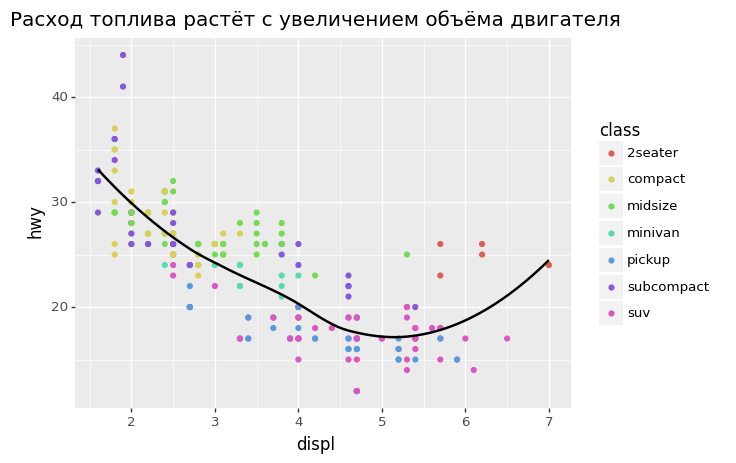

<ggplot: (390664177)>

In [4]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
labs(title="Расход топлива растёт с увеличением объёма двигателя")

## Основной целью заголовка является обобщение основного результата наблюдения. Избегайте заголовков, которые просто описывают графики, например,  "Диаграмма зависимости расхода топлива от объёма двигателя".

## Также вы можете использовать labs() для задания названий осей и легенд. Как правило, хорошей идеей будет заменить формальные обозначения категорий на более развёрнутое их описание с указанием размерности (при необходимости).

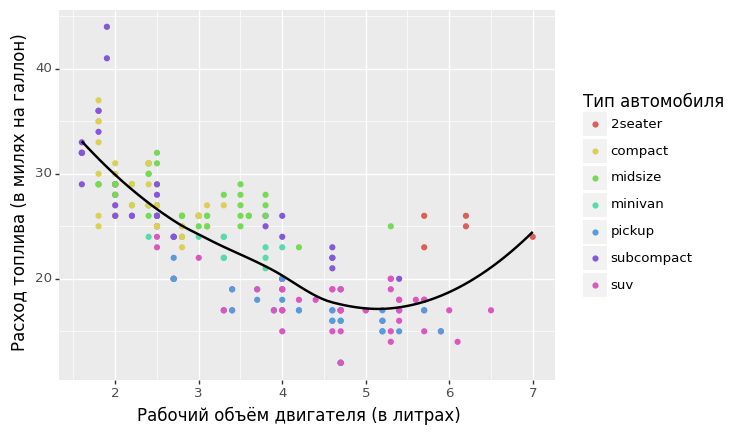

<ggplot: (391290871)>

In [5]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(x="Рабочий объём двигателя (в литрах)",
     y="Расход топлива (в милях на галлон)",
     colour="Тип автомобиля")

## Можно даже добавить математическое выражение вместо текстовых строк с помощью LaTeX:

К сожалению, не смог запустить, но верю в такие возможности :)

In [6]:
from matplotlib import rc
rcParams('text', usetex=True)

df = pd.DataFrame({"x": np.random.uniform(size=10),
                   "y": np.random.uniform(size=10)})

ggplot(df, aes("x", "y")) +\
geom_point() +\
labs(x="$\\sum_{i = 1}^n{x_i^2}$",
     y="$\\alpha + \\beta + \\frac{\\delta}{\\theta}$")

TypeError: 'RcParams' object is not callable

## Не забудьте потом отключить эту опцию.

In [8]:
rc('text', usetex=False)

### Создайте график на основе датафрейма mpg с заданными вручную заголовком, и осями x и y.

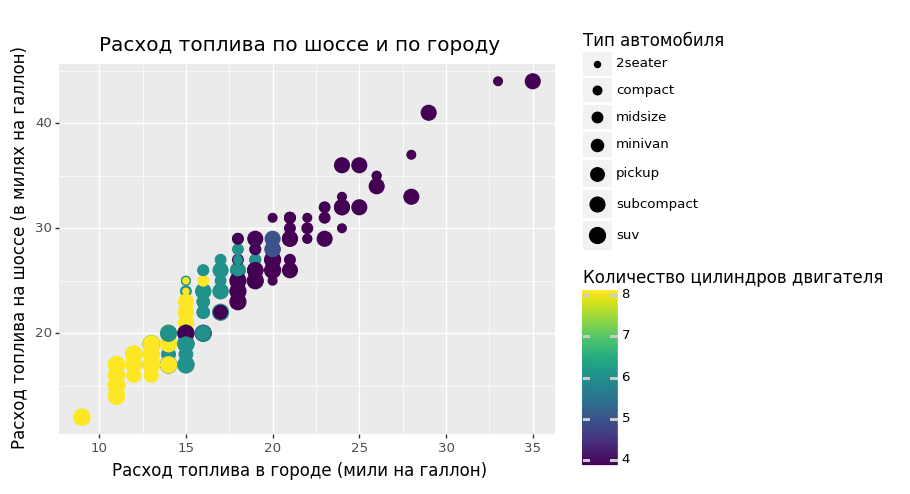

<ggplot: (391477694)>

In [9]:
ggplot(mpg) +\
geom_point(mapping = aes(x='cty', y='hwy', size='class', color='cyl')) +\
labs(title='Расход топлива по шоссе и по городу',
     x="Расход топлива в городе (мили на галлон)",
     y="Расход топлива на шоссе (в милях на галлон)",
     colour="Количество цилиндров двигателя", size='Тип автомобиля')

### Для одного из графиков, сформированных в прошлой лабораторной по собственным данным, придумайте название и подписи к осям.

In [10]:
fifa = pd.read_csv(r"../Lab1/Data/players_20.csv")

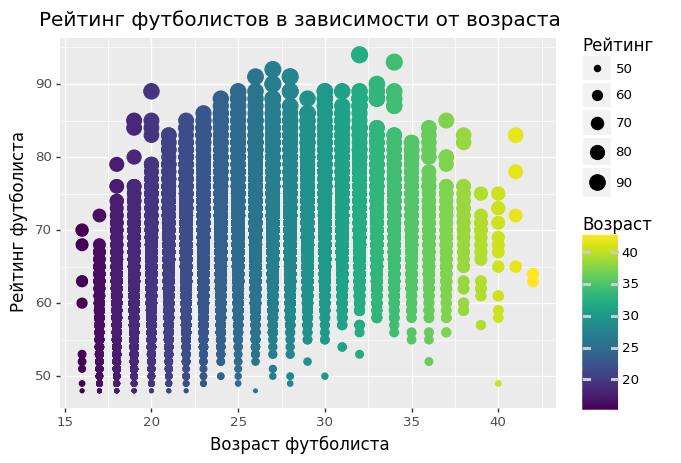

<ggplot: (401882302)>

In [11]:
ggplot(fifa) +\
geom_point(mapping = aes(x='age', y='overall', size='overall', color='age')) +\
labs(title='Рейтинг футболистов в зависимости от возраста',
     x="Возраст футболиста",
     y="Рейтинг футболиста",
     colour="Возраст", size='Рейтинг')

## Кроме основных элементов графика, можно подписывать и отдельные наблюдения. Сначала попробуем использовать geom_text(). У него все те же свойства, что у geom_point(), но добавляется свойство label.
## В качестве источника данных создадим датафрейм, в который поместим самую эффективную по расходу топлива марку автомобиля для каждого класса.

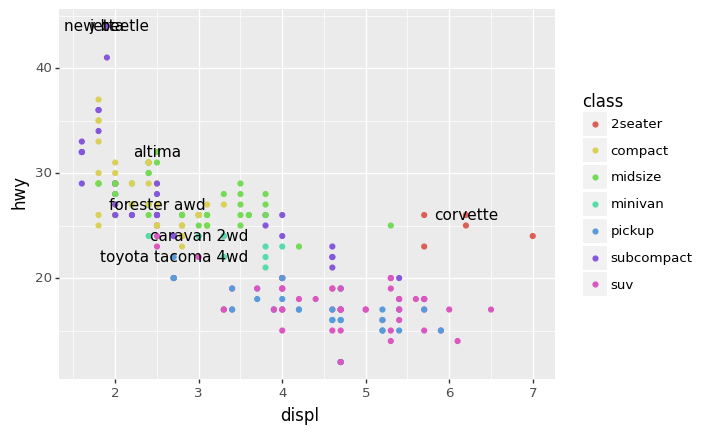

<ggplot: (391500954)>

In [12]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

## Выглядит не очень. Текст перекрывает как сам себя, так и точки. Немного улучшить ситуацию можно заменив geom_text() на geom_label(), заодно добавив прозрачности и небольшой сдвиг по y.

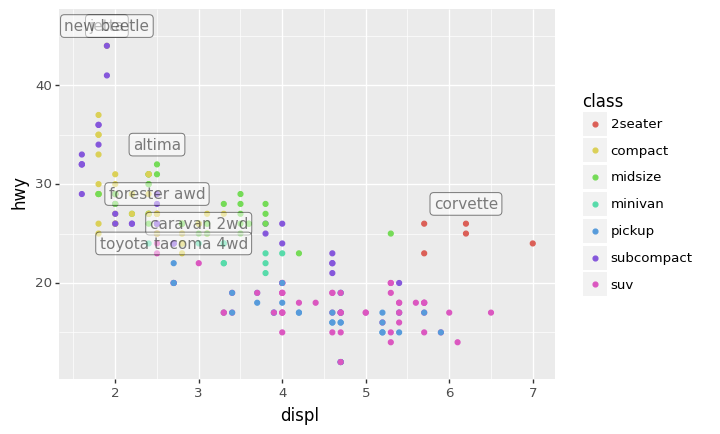

<ggplot: (688773241)>

In [13]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_label(aes(label="model"), data=best_in_class, nudge_y=2, alpha=0.5)

## Стало лучше, но в верхнем левом углу надписи всё ещё перекрывают друг друга. Устранить это перекрытие, используя одинаковое смещение для всех текстовых блоков, не получится. К счастью, есть переменная adjust_text.

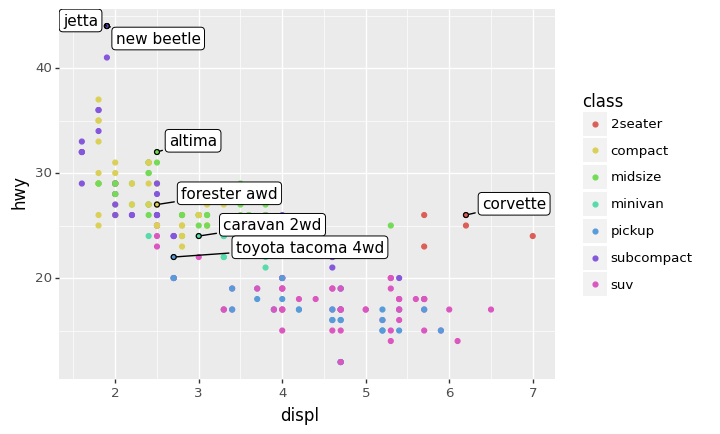

<ggplot: (688688125)>

In [14]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_point(data=best_in_class, fill='none') +\
geom_label(aes(label="model"), data=best_in_class, adjust_text={
    'expand_points': (1.5, 1.5),
    'arrowprops': {
        'arrowstyle': '-'
    }})

## Обратите внимание, что мы нарисовали большие чёрные точки поверх выделенных.

## Вместо легенды иногда можно использовать тот же приём. Это не очень приятно выглядит на конкретном графике, но вообще может быть полезным.

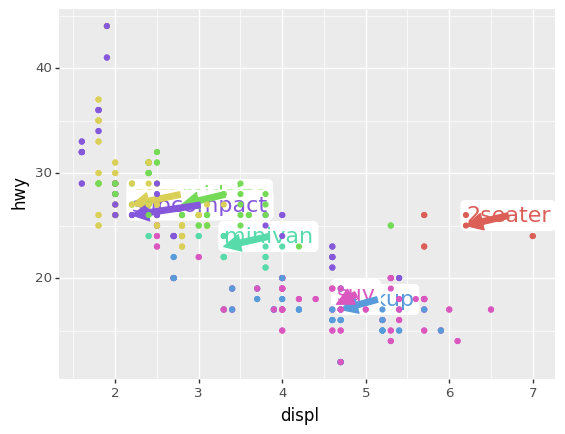

<ggplot: (688689532)>

In [15]:
class_avg = mpg\
.groupby("class")["displ","hwy"].median()\
.reset_index()

ggplot(mpg, aes("displ", "hwy", colour="class")) +\
geom_point() +\
geom_label(aes(label="class"), data=class_avg, size=16, label_size=0, adjust_text={'expand_points': (0, 0)}) +\
geom_point() +\
theme(legend_position="none")

## На график можно добавить и простой фрагмент текста. Но для этого всё равно нужен будет DataFrame. 

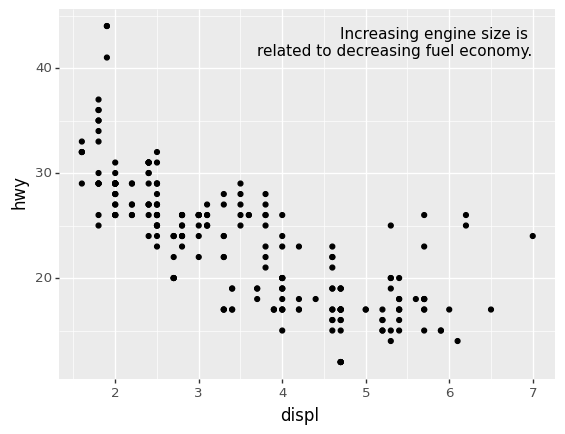

<ggplot: (688808509)>

In [16]:
label = pd.DataFrame({"displ": [mpg.displ.max()],
                      "hwy": [mpg.hwy.max()],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Чтобы поместить текст в самый край нужно будет использовтаь `+np.Inf` и `-np.Inf`:

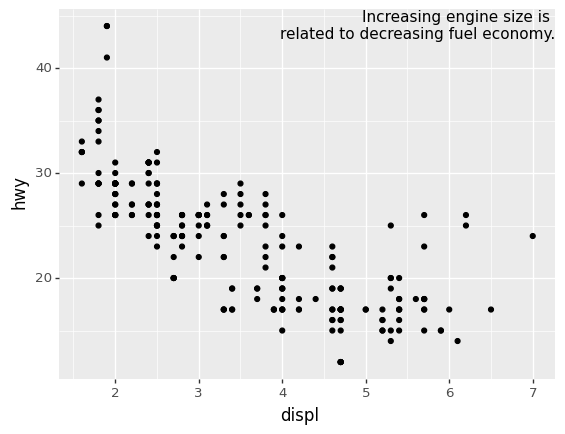

<ggplot: (688690713)>

In [17]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Во всех этих примерах перенос слов между строками производился вручную с использованием `"\n"`. Можно использовать функцию `fill` из модуля `textwrap`.

In [18]:
from textwrap import fill

print(fill("Increasing engine size is related to decreasing fuel economy.", width=40))

Increasing engine size is related to
decreasing fuel economy.


## Параметры `ha` и `va` определяют местоположение текста. Все девять вариантов – ниже.

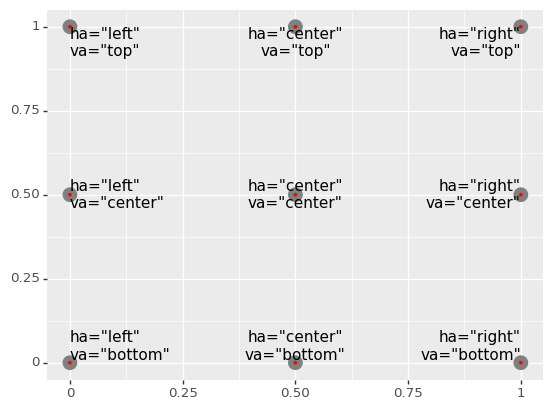

<ggplot: (689080489)>

In [19]:
from itertools import product

has = ["left", "center", "right"]
vas = ["top", "center", "bottom"]
xs = [0, 0.5, 1]
ys = [1, 0.5, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(3), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Используйте `geom_text()` с положением в бесконечности, чтобы поместить текст в каждый из четырёх углов графика

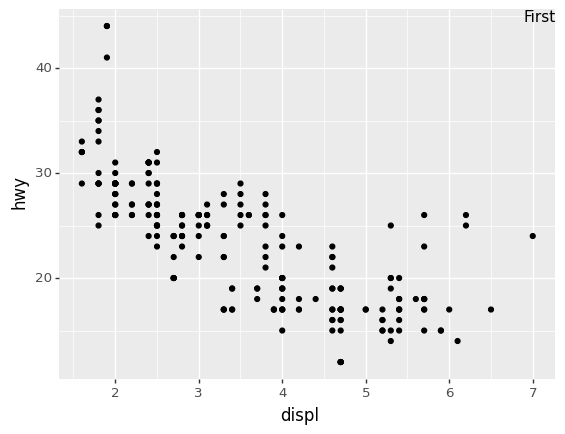

<ggplot: (689252901)>

In [30]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "First"})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

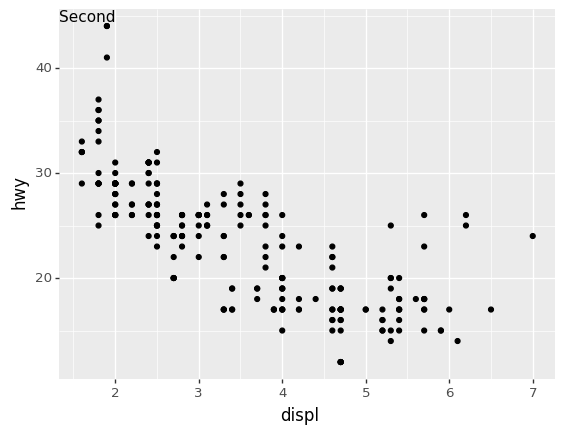

<ggplot: (689544512)>

In [40]:
label = pd.DataFrame({"displ": [-np.Inf],
                      "hwy": [np.Inf],
                      "label": "Second"})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="left")

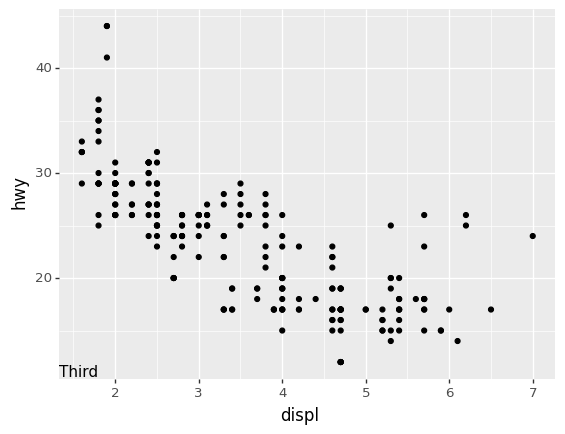

<ggplot: (689685685)>

In [41]:
label = pd.DataFrame({"displ": [-np.Inf],
                      "hwy": [-np.Inf],
                      "label": "Third"})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="bottom", ha="left")

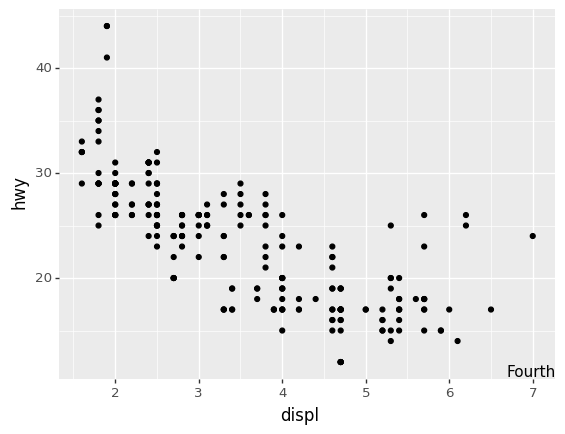

<ggplot: (689619324)>

In [42]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [-np.Inf],
                      "label": "Fourth"})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="bottom", ha="right")

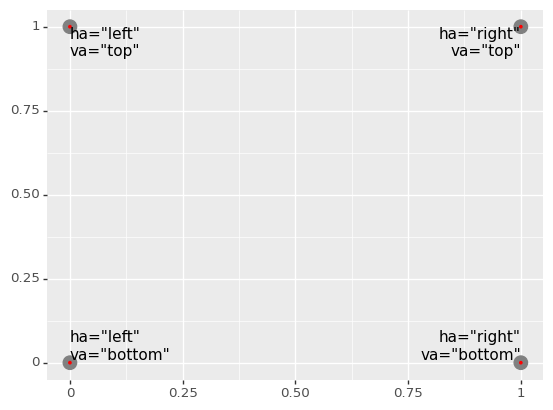

<ggplot: (693803885)>

In [150]:
from itertools import product

has = ["left", "right"]
vas = ["top", "bottom"]
xs = [0, 1]
ys = [1, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(2), repeat=2)])

ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Поэкспериментируйте, как `geom_text()` работает с панелями. Сможете добавить подпись в одну выбранную панель?

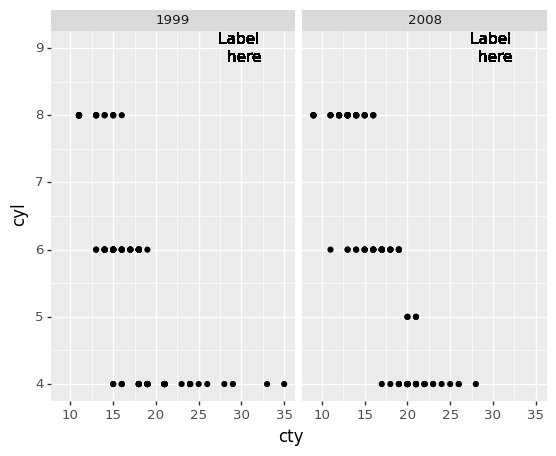

<ggplot: (694410521)>

In [145]:
label = pd.DataFrame({"cty": [np.Inf],
                      "cyl": [np.Inf],
                      "label": "Label \n here"})

ggplot(mpg) +\
geom_point(mapping=aes(x='cty', y='cyl')) +\
facet_wrap('~ year') +\
geom_text(aes(x='30', y='9', label = label.label))

### Используйте `geom_hline()` или `geom_vline()` для обозначения пороговых значений.

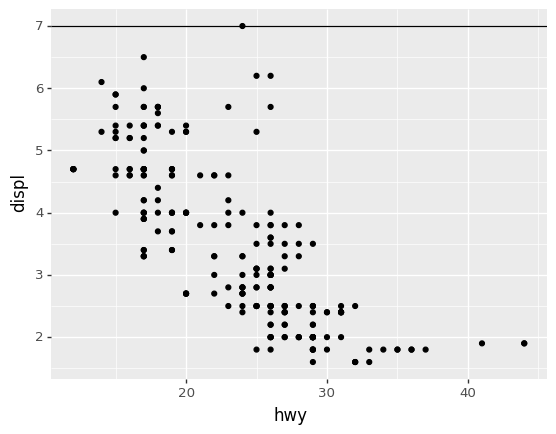

<ggplot: (693653408)>

In [62]:
ggplot(mpg) +\
geom_point(mapping=aes(x='hwy', y='displ')) +\
geom_hline(
  data = mpg,
  yintercept = max(mpg.displ)
)

### Используйте `geom_rect()`, чтобы нарисовать область интереса на графике.

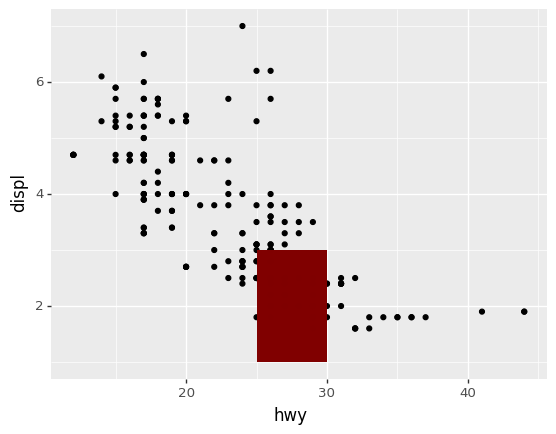

<ggplot: (694916503)>

In [85]:
ggplot(mpg, aes(x='hwy', y='displ')) +\
geom_point() +\
geom_rect(aes(xmin = '25', xmax = '30', ymin = '1', ymax = '3'), fill = '#800000', alpha = 0.5)

### Используйте `geom_segment()`, чтобы нарисовать стрелку на графике.

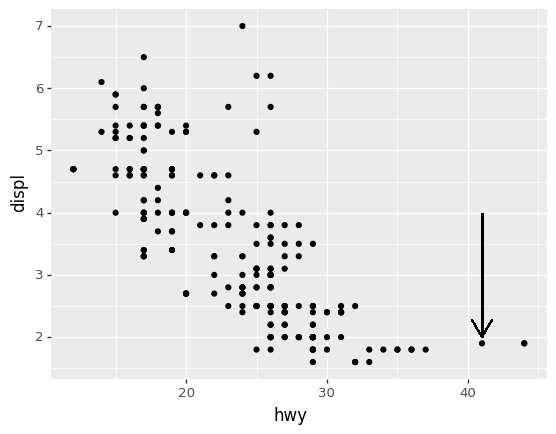

<ggplot: (694517824)>

In [102]:
ggplot(mpg, aes(x = 'hwy', y = 'displ')) +\
geom_point() +\
geom_segment(aes(x = '41', y = '4', xend = '41', yend = '2'), arrow = arrow(length = (0.2)))

## Ещё один способ улучшить понятность графиков – выбрать правильные масштабы осей.
## Обратите внимание на разницу между `breaks` и `labels`. Первые – это засечки на осях, а вторые – подписи у этих засечек.

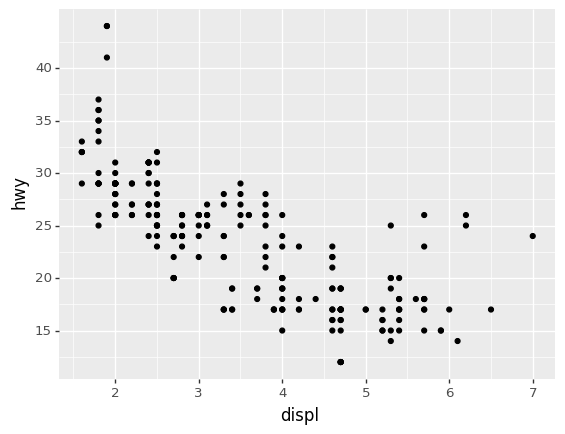

<ggplot: (694309392)>

In [103]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_y_continuous(breaks=range(15, 45, 5))

## Можно, например, передать в качестве 'labels' список пустых строк нужного размера.

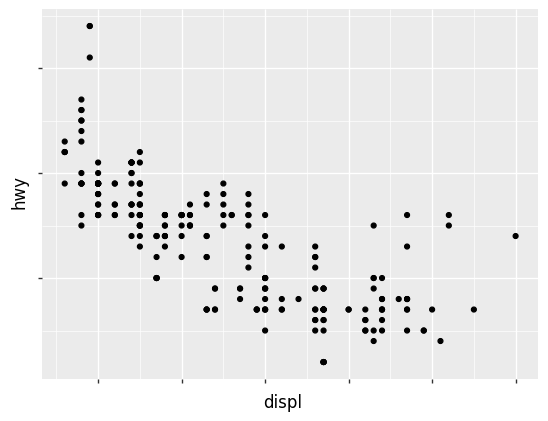

<ggplot: (693940249)>

In [104]:
def no_labels(values):
    return [""] * len(values)

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_x_continuous(labels=no_labels) +\
scale_y_continuous(labels=no_labels)

## Можно использовать `breaks` в случае, когда у вас мало конкретных значений, и вам хочется акцентировать внимание именно на них.

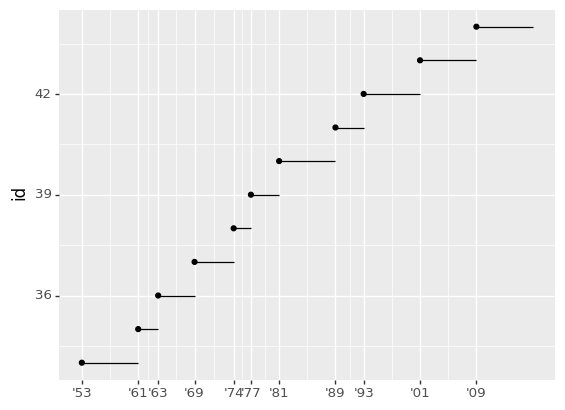

<ggplot: (694988026)>

In [105]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

## Местоположение легенды. В целом, всё тривиально.

In [106]:
base = ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))

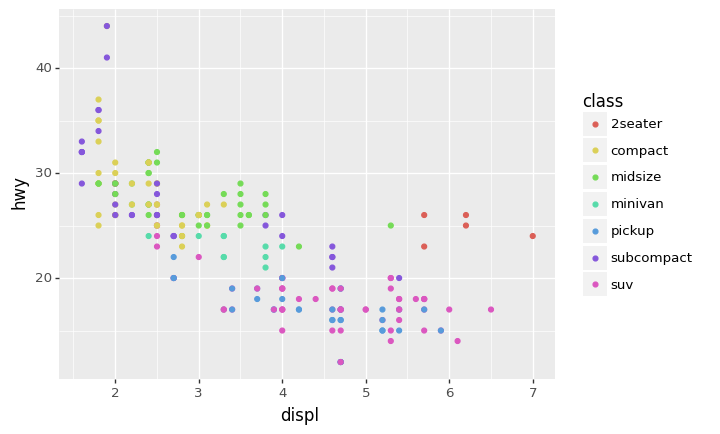

<ggplot: (690732126)>

In [107]:
base + theme(legend_position="right")

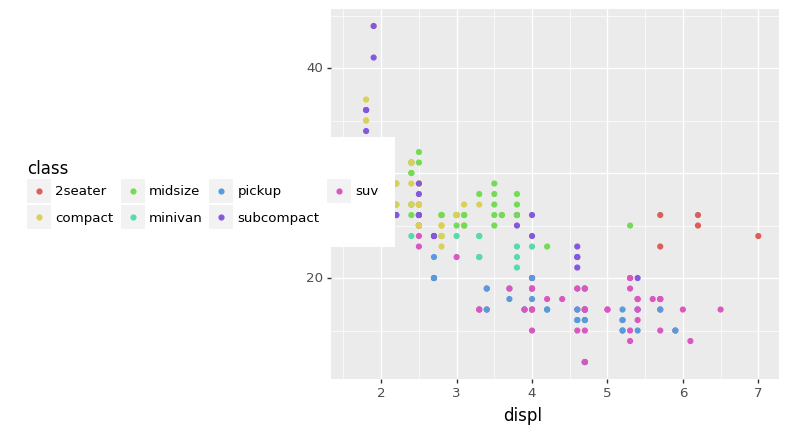

<ggplot: (694706993)>

In [108]:
base + theme(subplots_adjust={'left': 0.2}) + theme(legend_position=(0, 0.5))

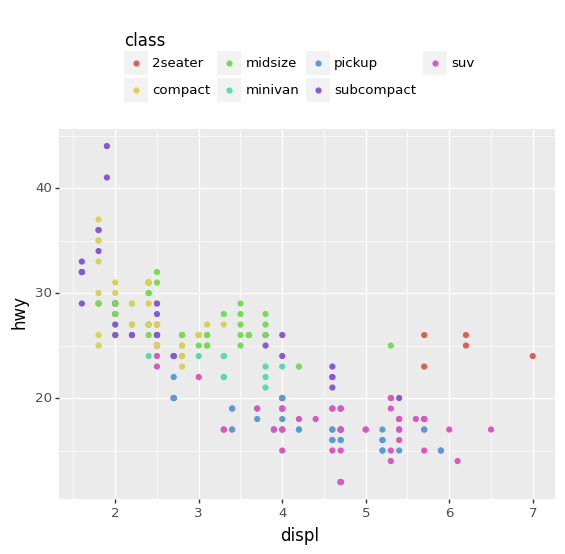

<ggplot: (690547285)>

In [109]:
base + theme(legend_position="top")

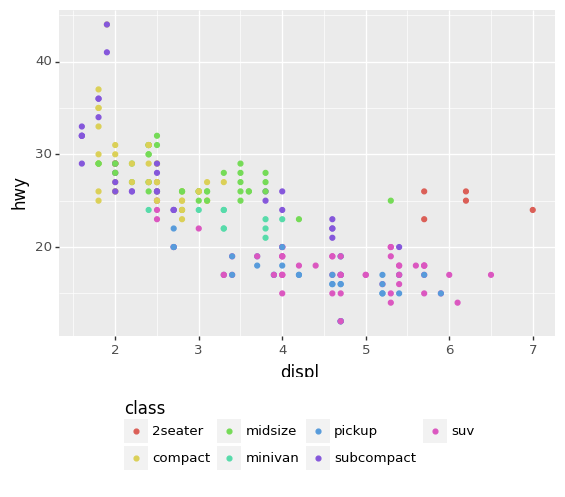

<ggplot: (695310945)>

In [110]:
base + theme(subplots_adjust={'bottom': 0.2}, legend_position=(.5, 0), legend_direction='horizontal')

## Можно вообще убрать легенду с помощью `legend_position="none"`.

### С использованием `guides` можно настроить вид легенды ещё более детально.

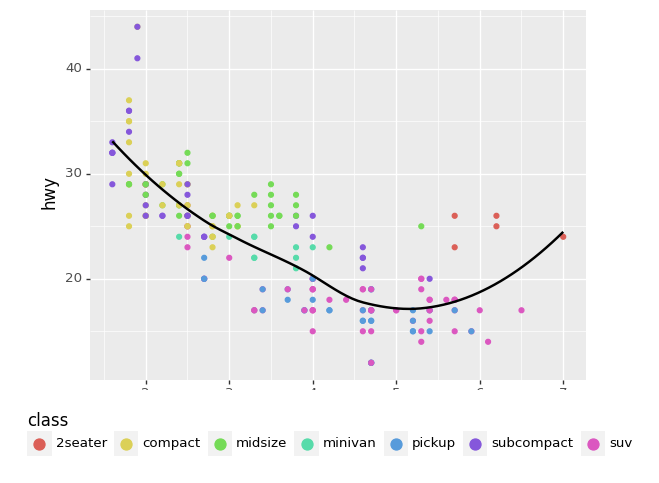

<ggplot: (695303428)>

In [111]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
theme(legend_position="bottom") +\
guides(colour=guide_legend(nrow=1, override_aes={"size": 4}))

## Масштаб и шкала осей

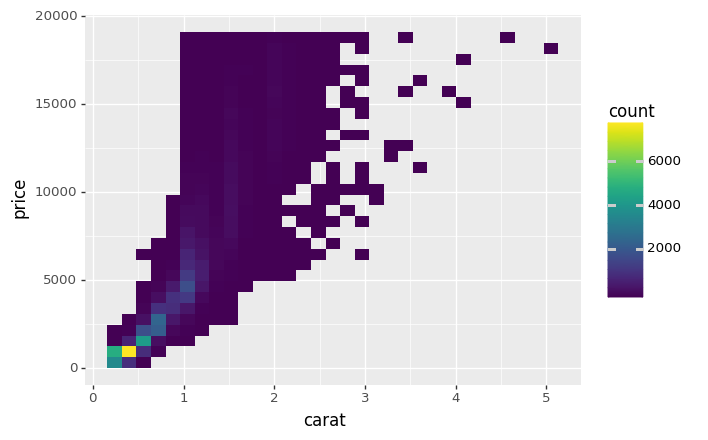

<ggplot: (693906731)>

In [112]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d()

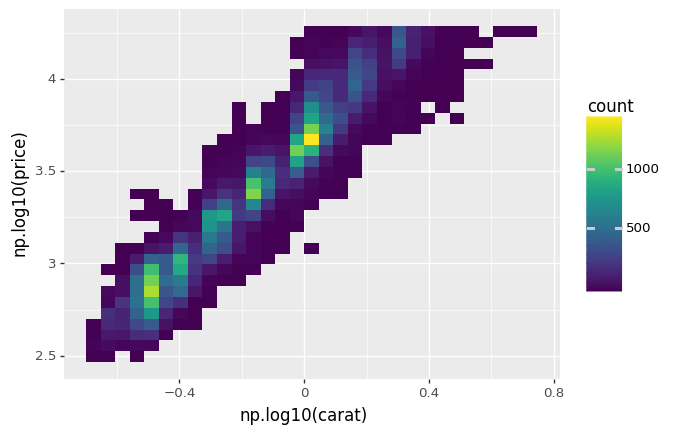

<ggplot: (694951244)>

In [113]:
ggplot(diamonds, aes("np.log10(carat)", "np.log10(price)")) +\
geom_bin2d()

## Чтобы значения на осях остались исходными можно воспользоваться переопределением осей: `scale_x_log10()` и `scale_y_log10()`.

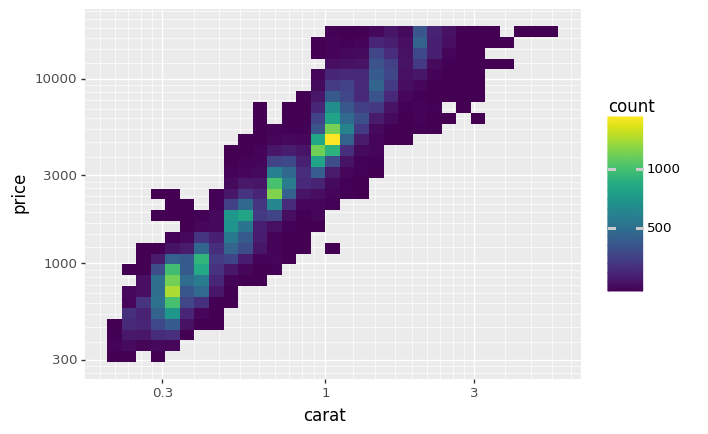

<ggplot: (693668334)>

In [114]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d() +\
scale_x_log10() +\
scale_y_log10()

## Также часто переопределяют значения цветов.
## Вот так график выглядит по умолчанию

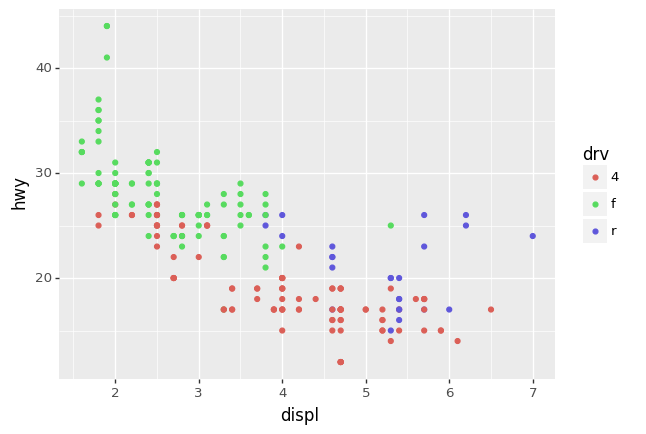

<ggplot: (693668431)>

In [115]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv"))

## А так для `palette="Set1"`

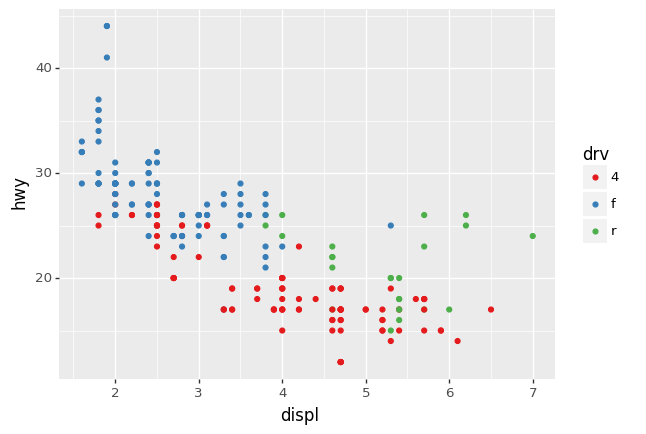

<ggplot: (693872312)>

In [116]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## А чтобы было ещё более заметно разницу, можно добавить другую форму.

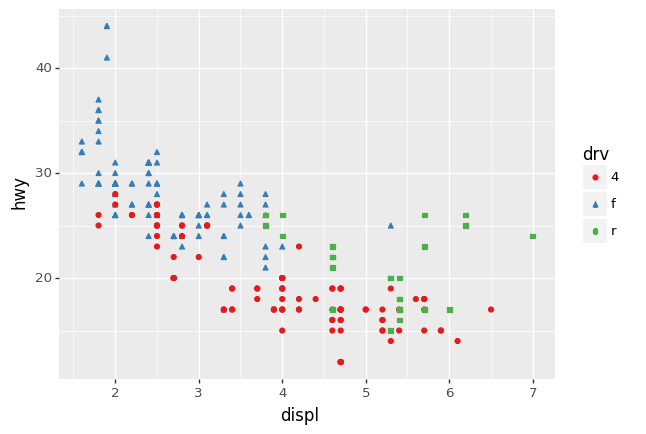

<ggplot: (693670437)>

In [117]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv", shape="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## Подробнее цветовые схемы описаны тут: <http://colorbrewer2.org/>.

## А ещё можно задать цвета вручную: `scale_colour_manual()`.

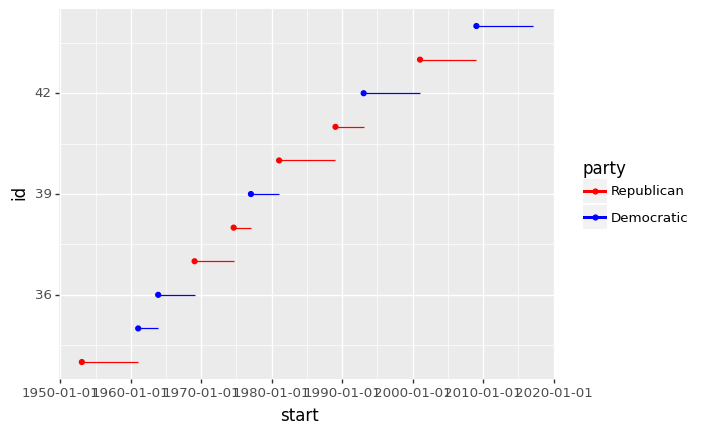

<ggplot: (693839728)>

In [118]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["red", "blue"], limits=["Republican", "Democratic"])

### "Ну поиграйте с цветами, вы же дизайнер"

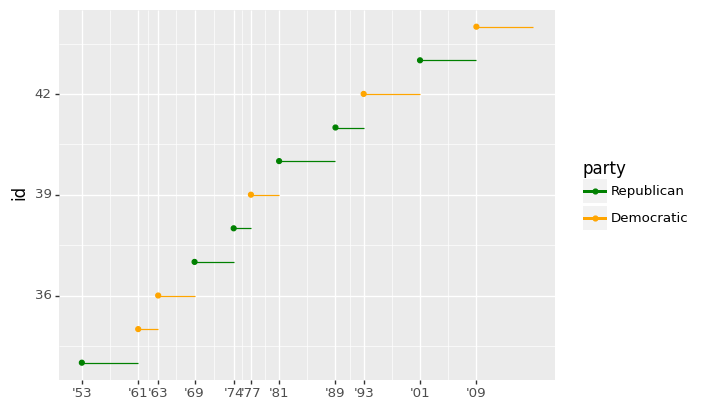

<ggplot: (695618055)>

In [131]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["green", "orange"], limits=["Republican", "Democratic"]) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

## Иногда результат зависит от пределов значений на графике

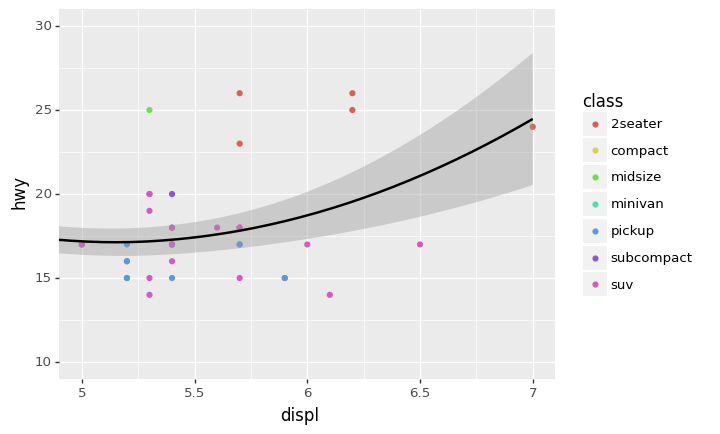

<ggplot: (694440756)>

In [119]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

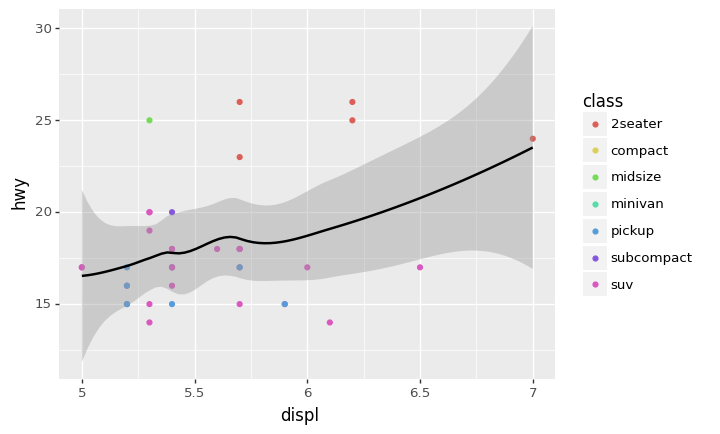

<ggplot: (693783290)>

In [120]:
ggplot(mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30"), aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth()

## Когда вы хотите сравнить значения двух графиков с совпадающими осями x и y, имеет смысл зафиксировать макмимальные и минимальные значения на этих осях.

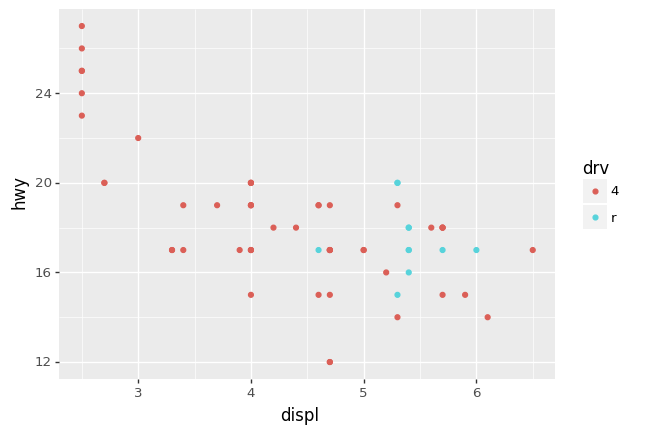

<ggplot: (694357857)>

In [121]:
mpg["drv"] = mpg["drv"].astype(str)
suv = mpg[mpg["class"] == "suv"]
compact = mpg[mpg["class"] == "compact"]

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point()

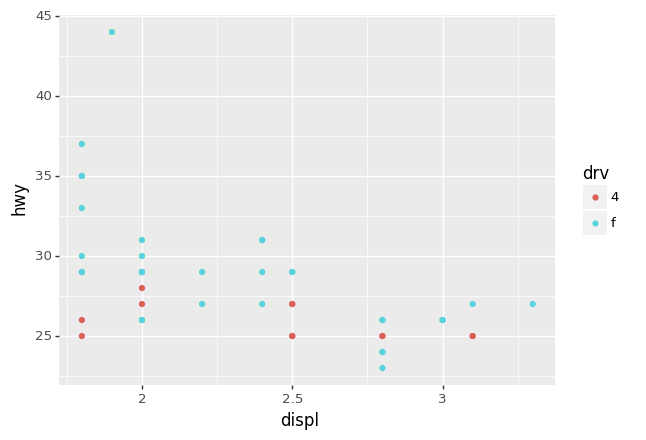

<ggplot: (694357827)>

In [122]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point()

## Например, сохранив эти значения в одельную переменную.

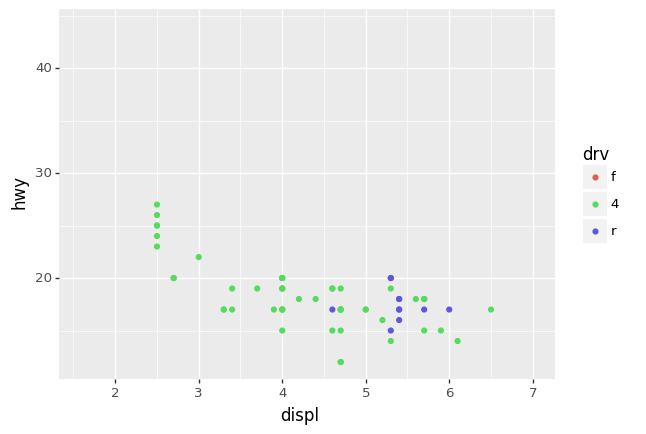

<ggplot: (693483545)>

In [123]:
x_scale = scale_x_continuous(limits=(mpg.displ.min(), mpg.displ.max()))
y_scale = scale_y_continuous(limits=(mpg.hwy.min(), mpg.hwy.max()))
col_scale = scale_colour_discrete(limits=mpg.drv.unique())

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

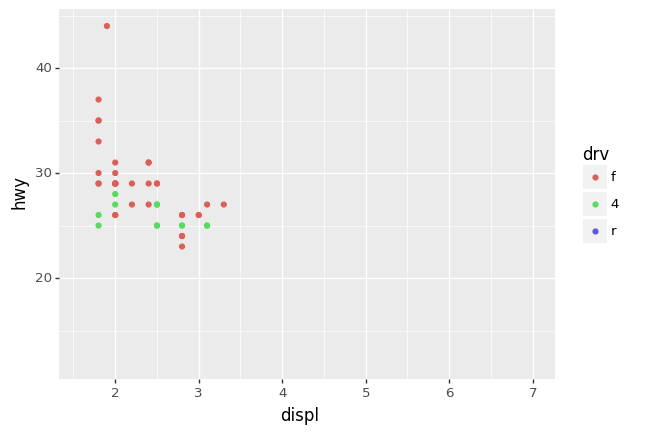

<ggplot: (693463149)>

In [124]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

## Внешний вид можно менять настройкой тем

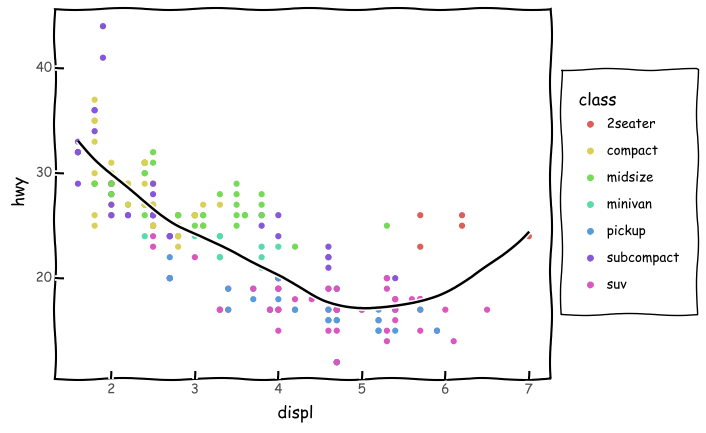

<ggplot: (695815870)>

In [125]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
theme_xkcd()

## Сохранить последний нарисованный график можно с использованием:
## `_.save("my-plot.pdf")`
## В качестве настроек используются: `width`, `height`, `units`, и `dpi`. 

In [128]:
_.save("my-plot.pdf")

## Если кто-то в предыдущей лабораторной не сделал творческое задание – самое время это сделать. Кто сделал – тот молодец!